# Decision Tree Regression

## Dataset

Have a quick look at the dataset.

In [1]:
%cat ../00_data/Position_Salaries.csv | head

Position,Level,Salary
Business Analyst,1,45000
Junior Consultant,2,50000
Senior Consultant,3,60000
Manager,4,80000
Country Manager,5,110000
Region Manager,6,150000
Partner,7,200000
Senior Partner,8,300000
C-level,9,500000


In [2]:
%cat ../00_data/Position_Salaries.csv | tail

Business Analyst,1,45000
Junior Consultant,2,50000
Senior Consultant,3,60000
Manager,4,80000
Country Manager,5,110000
Region Manager,6,150000
Partner,7,200000
Senior Partner,8,300000
C-level,9,500000
CEO,10,1000000

## Goal

Apply the Decision Tree Regression to predict the salary by the level of position.

## Load the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [4]:
df = pd.read_csv('../00_data/Position_Salaries.csv', sep=',')

df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


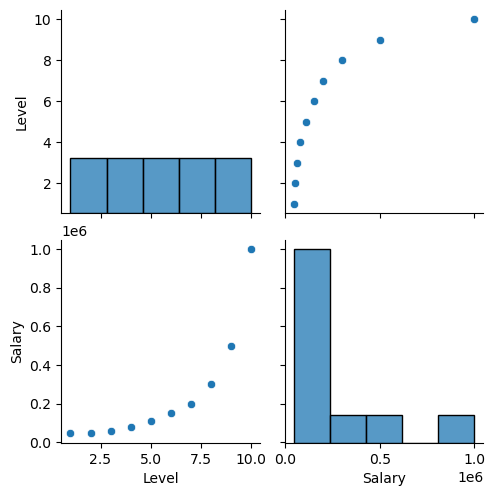

In [5]:
sns.pairplot(df);

## Data Preprocessing

In [6]:
df.shape

(10, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [8]:
np.sum(df.isna(), axis=0)

Position    0
Level       0
Salary      0
dtype: int64

## Target Variable and Features

+ Target Variable: `Salary`
+ Features:
    + `Level`

In [11]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [12]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [13]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

## Training the model on whole dataset

In [17]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)


DecisionTreeRegressor(random_state=0)

## Testing the model

In [18]:
y_pred = regressor.predict(X)
y_pred

array([  45000.,   50000.,   60000.,   80000.,  110000.,  150000.,
        200000.,  300000.,  500000., 1000000.])

## Model Evaluation

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R^2 Score: 1.00


## Model Viz

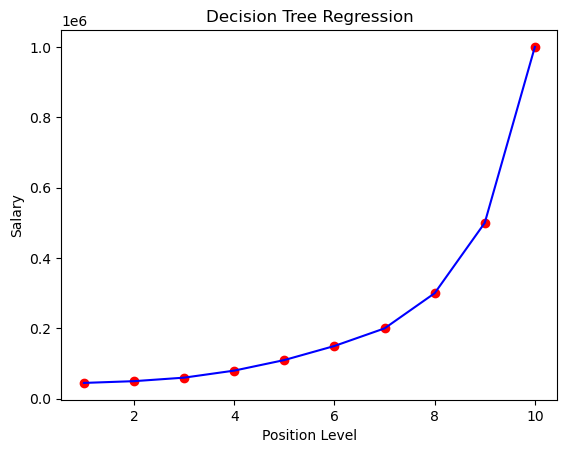

In [21]:
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X).reshape(-1, 1), color='blue')
plt.title('Decision Tree Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

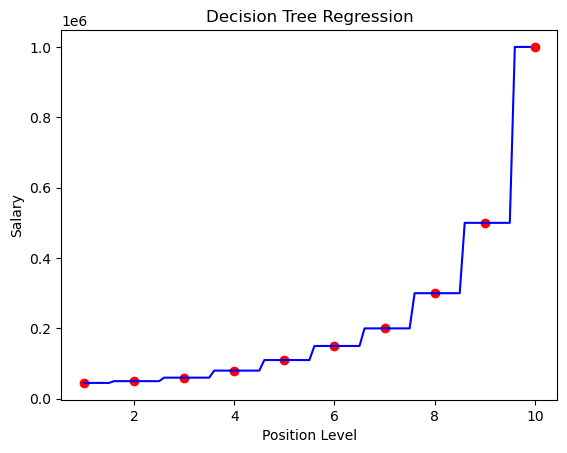

In [23]:
X_grid = np.arange(X.min(), X.max(), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid).reshape(-1, 1), color='blue')
plt.title('Decision Tree Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result

In [24]:
# predicting a new value
new_data = [[6.5]]
print(f"New Data: {new_data}")
new_result = regressor.predict(new_data)
print(f"New Result: {new_result}")

New Data: [[6.5]]
New Result: [150000.]


# Pipeline

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor

pipe = Pipeline(
    steps=[ 
        ("dtr", DecisionTreeRegressor())
    ]
)

pipe

Pipeline(steps=[('dtr', DecisionTreeRegressor())])

In [27]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

pipe.fit(X, y)

Pipeline(steps=[('dtr', DecisionTreeRegressor())])

In [28]:
# make prediction to a new data
result = pipe.predict([[6.5]])
print(f"Predicted value for Level=6.5: {result}")

Predicted value for Level=6.5: [150000.]


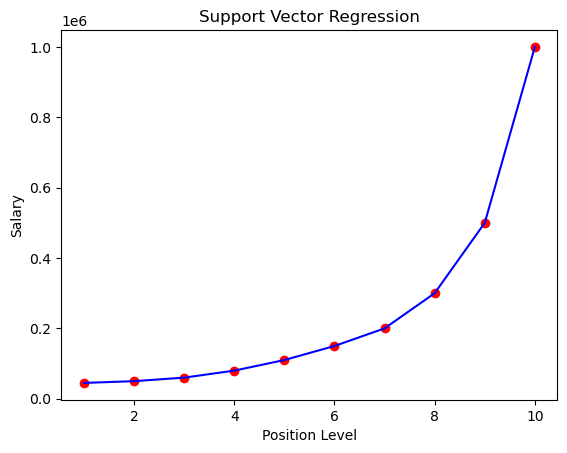

In [29]:
# Data viz
plt.scatter(X, y, color='red')
plt.plot(X, pipe.predict(X), color='blue')
plt.title('Support Vector Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Tuning DTR

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'dtr__max_depth': np.arange(1, 6)  
}

# Seasing the best model
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
best_model = grid_search.fit(X, y)
y_pred = grid_search.best_estimator_.predict(X)

grid_search.param_grid

{'dtr__max_depth': array([1, 2, 3, 4, 5])}

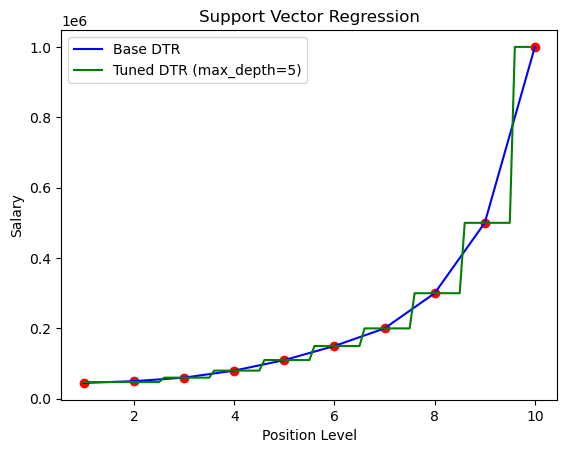

In [56]:
# Data viz
plt.scatter(X, y, color='red')
plt.plot(X, pipe.predict(X), color='blue', label='Base DTR')

X_grid = np.arange(X.min(), X.max(), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, grid_search.best_estimator_.predict(X_grid), color='green', label=f'Tuned DTR (max_depth={grid_search.best_params_["dtr__max_depth"]})')

plt.legend(loc="upper left")
plt.title('Support Vector Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [57]:
# best model
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 1250000.0
Mean Absolute Error: 500.0
R^2 Score: 1.00


In [44]:
# Prediction of a new result
grid_search.best_estimator_.predict([[6.5]])

array([150000.])